<a href="https://colab.research.google.com/github/dioallan/testecolab/blob/main/T6%20-%20Atividade%20de%20aprofundamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [3]:
#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction

In [4]:
#Monta-se os dados que queremos verificar em um DataFrame Pandas
texto_verificar = np.array([
                    ("Omelete", "Velozes e Furiosos volta a ficar mais ágil, com sabor de último gás", "Dez filmes. Quando uma franquia alcança essa marca, seu principal desafio é vencer o cansaço: tanto o tédio dos realizadores, que imagina-se a essa altura terem explorado e aperfeiçoado tudo o que a franquia permitia, quanto a tolerância dos espectadores, cuja suspensão de descrença é posta à prova em mais uma narrativa episódica e circular justificada pelo excesso. Velozes e Furiosos chega a essa marca em um filme cujo apelo principal, em teoria, é encerrar a fatura. Não se trata, portanto, de trazer submarinos ou espaçonaves à mistura, mas começar a se despedir dessa família cada vez mais numerosa. É por isso que voltam os rachas dos primeiros Velozes (ainda que de forma muito modesta) e é por isso que a trama escolhida incorpora literalmente o caráter circular. Ao reencenar a ação de Velozes e Furiosos 5 para mostrar que o vilão interpretado no Rio de Janeiro por Joaquim de Almeida havia deixado um filho órfão, a franquia se fecha em si mesma e, de quebra, homenageia aquele que é o melhor filme dos dez (o cofre arrastado pelas ruas ainda arrepia). Ao contrário de um Vingadores: Ultimato, Velozes e Furiosos 10 não faz a partir dessa premissa um exercício de nostalgia. O motivo parece ser muito simples e até cômico: não há muita nostalgia a sentir em relação ao rastro de destruição deixado filme após filme, nem em relação ao contingente de personagens definidos pela funcionalidade. Velozes e Furiosos se aproxima muito dos filmes-catástrofes nesse sentido. O valor primeiro do seu espetáculo são a descartabilidade (todo objeto ou cenário pode ser dizimado, substituído) e a reciclagem (todo vilão se torna candidato a aliado em seguida); qualquer reminiscência carinhosa que se tire disso, então, automaticamente adquire um certo caráter de desvio. Se Velozes e Furiosos 10 resulta um filme irresistível é porque faz caber em perfeita harmonia as duas coisas: o desvio e a norma. A norma é encadear uma cena de ação na outra sem deixar o ritmo cair, com todas as conveniências de roteiro que a essa altura nós permitimos de Velozes (a vantagem desses 20 anos de dieta de filme de super-herói é que não estranhamos mais quando personagens aparecem de repente, saltando em cena, do nada). Isso fica sob a responsabilidade de Louis Leterrier, o diretor contratado às pressas para substituir Justin Lin quando as câmeras já estavam rodando. Leterrier é um grande artesão de ação e ele torra o orçamento gordo de US$300 milhões sem descuidar da decupagem e da coreografia de câmera. O fato de o roteiro separar a família em pequenos núcleos favorece a ação: as cenas são mais curtas e retêm um senso de urgência e variedade, como a luta entre Michelle Rodriguez e Charlize Theron, ou a sequência breve com Jason Statham. A sensação é que Velozes se depura e fica mais leve, ante os filmes 8 e 9, marcados essencialmente pelo inchaço.  Ou seja, a norma é andar em linha reta mesmo nas distrações, responder a um chamado de eficiência e agilidade, e principalmente não deixar muito respiro para que o espectador questione motivos e causalidades. Vai tocar um funk carioca na cena na Antártica e vai tocar um reggaeton na cena no Rio de Janeiro - e tudo bem. Uma vez que assumimos que tudo meio que se esvazia de sentido, já que as coisas são marcadas pela inconsequência e pela uniformidade (desde as grandes explosões que não matam ninguém até pequenezas como o fato de todo personagem ser igualmente especialista em luta e volante), o que vai dar um lastro a Velozes 10 é justamente o desvio. Ninguém se sente mais precocemente nostálgico por Velozes do que Vin Diesel. Vamos considerar a hipótese de que nenhuma outra pessoa no mundo compartilha dessa nostalgia (já que estabelecemos aqui ser um sentimento desviado): isso só torna os caprichos do ator/produtor mais românticos. Vin Diesel forçou a saída de Justin Lin? O afastamento de Dwayne Johnson? Só pode ter sido por amor à causa - ou à cruz, que Dom carrega no peito. As cenas em que Dom fica revendo fotografias dos familiares na garagem, no carro ou na parede têm aquele tom alaranjado de sentimentalismo que Michael Bay nos ensinou a esperar nos seus contraluzes - uma assinatura visual plenamente assimilada por qualquer blockbuster de ação hoje em dia, cuja missão é atender tanto ao público adulto masculino quanto às demandas de comoção do filme-família. Com Vin Diesel, porém, o clichê emotivo reconquista um fundo de verdade. Seria até quixotesco se Dom não fosse um personagem tão competente no que faz melhor, ou seja, destruir. É por isso que a dinâmica do protagonista com o novo vilão interpretado por Jason Momoa parece funcionar tão bem. Se Diesel representa a autoindulgência do texto sentimentalista e essa noção deslocada de pertencimento e propósito, Momoa chega para oferecer o oposto, um vilão igualmente indulgente na canastrice, uma mistura de Jack Sparrow e Coringa, mas em uma chave autoconsciente de si. Quando o vilão tenta matar um dos heróis e ironiza que a família vai perder um integrante do churrasco, essa tirada quase metalinguística (sabemos que os filmes sempre se encerram com a refeição da família) tem acima de tudo o efeito de testar a convicção de Dom na consistência do universo ficcional que Diesel criou. Velozes 10 é um filme inconclusivo, como se sabe, e a história pode agora ganhar mais um ou dois longas-metragens antes de se encerrar. A disputa já tem um round definido, porém: Momoa ameaçou a integridade da fantasia com seus comentários irônicos e de algum modo Vin Diesel e Cia. permanecem de pé, vitoriosos na sua crença de que a franquia tem, sim, um páthos próprio para além do bombástico e da visível artificialidade do CGI. Enquanto a grande maioria dos filmes grandes hollywoodianos se refugia no cinismo, Velozes e Furiosos se recusa bravamente a quebrar a quarta parede, piscar para a câmera e ironizar a si mesmo. Quem diria que no fim uma parede ainda terminaria inteira."),
                    ("CinePOP"," Crítica | Velozes e Furiosos 10 é tão ABSURDO, surreal e nonsense que diverte e faz rir", "Se você chegou até aqui, você sabe do que que se trata a franquia ‘Velozes e Furiosos’. Tendo começado como um mero filme de corrida de carro e racha proibidão pelas ruas de Los Angeles, ao longo de mais de uma década o filme foi ganhando mais e mais desdobramentos, saindo da capital mundial do cinema e indo para outras cidades do mundo – na Europa, na Ásia e na América do Sul –, e até mesmo fora do mundo! Sim, já faz tempo que a franquia deixou sua proposta original e se tornou um dos filões do entretenimento mais bem sucedidos nos últimos anos. Mas até mesmo o sucesso tem seu fim, e o início do capítulo final da família Toretto chega essa semana nos cinemas, com ‘Velozes e Furiosos 10’. Dominic Toretto (Vin Diesel) está satisfeito por ter construído uma família com seus amigos, com quem partilhou todo tipo de experiência nos últimos anos. Ele está ensinando seu filho Brian (Leo Abelo Perry) a tomar gosto por carros, pois sabe que uma hora o bastão terá que ser passado. Porém, quando Cipher (Charlize Theron) ressurge em sua porta, dizendo que um inimigo em comum está vindo atrás dele, Toretto e Letty (Michelle Rodriguez) terão que fazer de tudo para proteger o filho e também aqueles que amam. Mas, para isso, precisarão da ajuda de todos eles, o que significa que a integridade da família será colocada em risco uma vez mais. Com duas horas e vinte de duração, nem dá pra sentir o tempo passar em ‘Velozes e Furiosos 10’, pois é pura diversão. É claro que não dá pra chegar a essa altura da franquia e pedir coerência ou seriedade no roteiro, pois há muito esses quesitos foram abandonados em prol do entretenimento apoiado no absurdo para fazer com que os personagens sejam pessoas reais mas com um quê de super-heróis, dentro de uma história que nem precisa ser interessante, uma vez que a sua execução é que é o grande chamariz. Isto dito, ‘Velozes e Furiosos 10’ consegue elevar o sarrafo já alto colocados por eles mesmos no filme anterior. Partindo do mote “quem você escolhe proteger na família”, o filme coloca em conflito o protagonista e um vilão excelente, estrelado por Jason Momoa, que confere ares de Coringa e Jack Sparrow na medida certa para construir um vilão mal e, ao mesmo tempo, adorável para o público. Dessa forma, ainda que torçamos para o protagonista conseguir seu objetivo, nós não necessariamente odiamos o vilão, pois ele é tão bem-feito e tão carismático, que rouba a cena. É uma grata surpresa perceber que 1/3 da história se passa no Rio de Janeiro, recuperando eventos que ocorreram neste filme da franquia e também trazendo novas cenas aqui, incluindo a participação especial da cantora Ludmilla, que não só emplacou uma música na trilha sonora como também participa deste filme, com fala e tudo. Aliás, a trilha sonora é um sucesso à parte, incluindo as vozes de Maneskin, cantando em italiano, e Daddy Yankee, com seu famoso reggeaton ‘Gasolina’. As cenas de ação e de perseguição são absurdas, caríssimas, não fazem o menor sentido – e por isso mesmo são tão divertidas. ‘Velozes e Furiosos 10’ faz a gente revirar os olhos o tempo todo, seja por frases cafonas ditas pelos personagens, seja por movimentos surreais para conseguir fazer com que os personagens se safem de situações impossíveis. ‘Velozes e Furiosos 10’ é tão absurdo, tão surreal, tão nonsense, que diverte. Se você não viu nada da franquia, não se preocupe, pois há um resumo no início. E se você é fã, prepare-se para muitas participações especiais e uma cena pós-créditos bem especial. Um filme pipocão, sem nenhuma preocupação com a realidade, e que por isso transporta feliz o espectador para o mundo da imaginação. Com muitos carrões, piadas sem graça e sequências de ação inexplicáveis, é pra acelerar e ver ‘Velozes e Furiosos 10 ."),
                    ("PlanoCritico","CRÍTICA | VELOZES E FURIOSOS 10","É tudo sobre família, sobre fé, sobre carros, velocidade… ou ao menos, estes são os valores que têm sido constantemente tratados como o coração da franquia Velozes e Furiosos, e nesse décimo capítulo, é evidente como tais princípios não conseguem gerar comoção alguma na dinâmica em que os personagens são programados para operar. E como um início de um desfecho dividido em três partes, a linha proposta pelo roteiro de Dan Mazeau e Justin Lin é de acenar para outros títulos da saga enquanto pavimentam a ação final, tendo como ponto de partida a sequência mirabolante chave: o roubo do cofre em Operação Rio, o que serve para a introdução do “Thanos” que Toretto não viu chegando: Dante, vivido por Jason Momoa. A ideia é uma forma da saga continuar se conectando com o próprio universo e também sugerir que terá mais exageros e leis da física sendo violadas para caber no estilo da ação descalibrada e ordinária. Porém, há sérios problemas na sequência inicial que embala a chegada do novo vilão e a reunião de Toretto e família, tanto em termos de execução das cenas quanto da montagem que apresenta uma transição grosseira entre os planos, sem falar dos cortes abruptos que se apressam em finalizar os arcos na tentativa de compor um ritmo frenético para o capítulo que busca ser mais caótico e melancólico com folga para o alívio cômico, e não precisa de um olhar mais atento para perceber que é na confusa divisão de núcleos e locações que a direção de Louis Leterrier disfarça a falta de propósito do filme. É um tanto irônico como o filme acredita estar em seu melhor momento e servindo entretenimento com sua proposta, e nisso, entregar contrapontos para a própria premissa. O primeiro momento que elucida isso é quando o histórico de Toretto e família é posto para reflexão “como se fizessem parte de uma seita de carros”, o que faz pensar que é exatamente esse o legado: uma franquia que foi remodelando seu mote inicial injetando facetas de outros subgêneros de ação até atingir esse nível esdrúxulo do absurdo sem limites, porém, Fast X quer ter mais fanservice, ser mais nostálgico, um Guerra Infinita se preparando Ultimato; a graça nisso é que a referência da ação em Velozes e Furiosos é por ser descarada, ao contrário da ideia que ridiculamente alude, de uma franquia que evoluiu e expandiu um estilo. O segundo momento que exemplifica a contradição das ideias é da set piece exagerada da vez, na sequência de uma bomba rolando pelas ruas de Roma, e por que isso não pode servir como uma metáfora à própria franquia: uma bomba que continua rolando e que promete explodir com mais duas sequências, a próxima prevista para 2025? E nessa primeira parte de mais de duas horas, o que sobra não justifica a promessa, contudo, Fast X foi estruturado para isso ao compor uma trama que se estende como um episódio de uma minissérie dividida em três capítulos, só organizando as peças, interrompendo cenas sem propósito e deixando os respectivos núcleos deslocados. Para continuar existindo, Velozes e Furiosos só precisa superar o número absurdo anterior de ação e reforçar os discursos sobre — e estender — a família. O fio de divertimento que resta, uma exceção não proposital, foi a inclusão de Momoa. Fica nítido a escolha de deixá-lo fazer sua performance para quem é vendido como o maior vilão que Toretto enfrentou, e o que temos é um combo de inspirações e trejeitos que resultam num Momoa que se diverte sendo canastrão. Seu Dante é um megalomaníaco que remete a Jack Sparrow, Charada, Coringa e Jigsaw além de — não intencionalmente — apresentar traços queer. A ideia de “maior ameaça” termina oferecendo o oposto do espetáculo da ação mirabolante e arcos desconexos, um entretenimento à parte graças ao método adotado por Momoa, o que supera o personagem escrito para ser um homem pirado em busca de vingança. Um bom exemplo disso é a zombaria que ele empresta ao dizer que Dominic já pode virar santo por toda sua devoção pela família, o que, claro, recai para a atuação hiper automática de Diesel, porém, esse humor é mais uma consequência inesperada do personagem do que autoparódia. Se Vin Diesel é Toretto e Toretto é Vin Diesel (sem distinção), os demais do elenco se divertem ao, de fato, darem vida a personagens caricatos e que funcionam dentro do que o roteiro pede para reproduzirem: uma autoparódia automática para papéis que são recorrentes. Tendo isso em mente, Velozes e Furiosos 10 é uma demonstração do encerramento da saga: sequências de ação sem critério e o apelo para a auto-homenagem pelo exercício melodramático da nostalgia. Mesmo para um final que busca o ápice e consegue ser anticlimático, mostra que Leterrier sabe no que se meteu e vai continuar esticando todos os elementos conhecidos da franquia, interrompendo a ação como cliffhanger e tentando o emular o ato que o MCU fez em três fases com três filmes. ")
])
df_ver = pd.DataFrame(data=texto_verificar, columns=["author", 'title', "content"])
df_ver.head()

,author,title,content
0,Omelete,"Velozes e Furiosos volta a ficar mais ágil, co...",Dez filmes. Quando uma franquia alcança essa m...
1,CinePOP,Crítica | Velozes e Furiosos 10 é tão ABSURDO...,"Se você chegou até aqui, você sabe do que que ..."
2,PlanoCritico,CRÍTICA | VELOZES E FURIOSOS 10,"É tudo sobre família, sobre fé, sobre carros, ..."


In [5]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
  
stemmer = nltk.stem.RSLPStemmer()

In [6]:
# remoção de palavras de parada
df_ver['content_treated'] = df_ver['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


#Transforma em minuscula e remoção de acentos 
df_ver['content_treated'] = df_ver['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')


<ipython-input-6-d72ee3795d08>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')
<ipython-input-6-d72ee3795d08>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df_ver['content_treated'] = df_ver['content_treated'].str.replace('[{}]'.format(string.digits), '')


array([[<Axes: title={'center': 'words_treated'}>]], dtype=object)

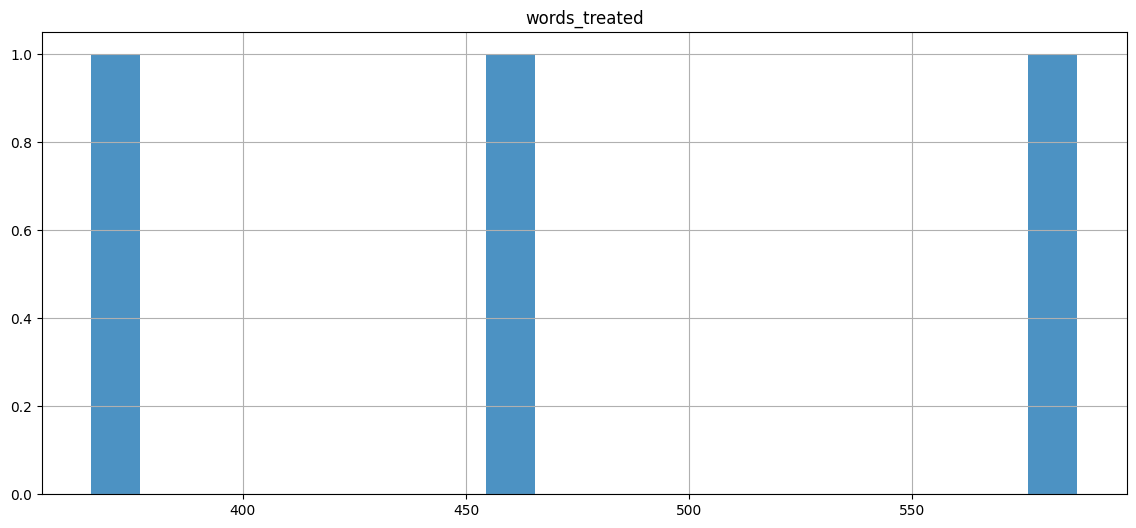

In [7]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_ver['words_treated'] = df_ver['content_treated'].str.split().str.len()
df_ver.hist(bins=20, alpha=0.8, figsize=(14,6))


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

XAJ = vectorizer.fit_transform(df_ver['content_treated'])

vocabulary_ver = vectorizer.get_feature_names_out()

pdXAJ = pd.DataFrame(data=XAJ.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]
display(pdXAJ)

XVER = vectorizer.fit_transform(df_ver['content_treated'])
vocabulary_ver = vectorizer.get_feature_names_out()
pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]


,abandonados,abelo,abruptos,absurdas,absurdo,acao,acelerar,acenar,acima,acredita,...,visivel,visual,vitoriosos,viu,vivido,volante,voltam,vozes,yankee,zombaria
0,0,0,0,0,0,5,0,0,1,0,...,1,1,1,0,0,1,1,0,0,0
1,1,1,0,1,2,2,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,1,0,2,8,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1


In [9]:
print(vocabulary_ver)

['abandonados' 'abelo' 'abruptos' 'absurdas' 'absurdo' 'acao' 'acelerar'
 'acenar' 'acima' 'acredita' 'adoravel' 'adotado' 'adquire' 'adulto'
 'afastamento' 'agilidade' 'agora' 'ainda' 'ajuda' 'alaranjado' 'alcanca'
 'alem' 'algum' 'alguma' 'aliado' 'alias' 'alivio' 'almeida' 'alto'
 'altura' 'alude' 'amam' 'ameaca' 'ameacou' 'america' 'amigos' 'amor'
 'andar' 'angeles' 'anos' 'antartica' 'ante' 'anterior' 'antes'
 'anticlimatico' 'ao' 'aparecem' 'apelo' 'aperfeicoado' 'apice' 'apoiado'
 'apos' 'apresenta' 'apresentar' 'apressam' 'aproxima' 'aqui' 'arcos'
 'ares' 'arrastado' 'arrepia' 'artesao' 'artificialidade' 'as' 'asia'
 'assimilada' 'assinatura' 'assumimos' 'atender' 'atento' 'atingir' 'ato'
 'ator' 'atras' 'atuacao' 'auto' 'autoconsciente' 'autoindulgencia'
 'automatica' 'automaticamente' 'autoparodia' 'bastao' 'bay' 'bem'
 'blockbuster' 'bom' 'bomba' 'bombastico' 'bravamente' 'breve' 'brian'
 'busca' 'caber' 'cada' 'cafonas' 'cair' 'camera' 'cameras' 'canastrao'
 'canastrice' 'c

In [10]:
len(vocabulary_ver)
df_XAJ = pdXAJ.T
df_XAJ['total_ver'] = df_XAJ.sum(axis=1) 
df_XAJ

,0,1,2,total_ver
abandonados,0,1,0,1
abelo,0,1,0,1
abruptos,0,0,1,1
absurdas,0,1,0,1
absurdo,0,2,2,4
...,...,...,...,...
volante,1,0,0,1
voltam,1,0,0,1
vozes,0,1,0,1
yankee,0,1,0,1


In [11]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XAJ = pdXAJ.T



#Calcula a quantidade de vezes que cada palavra é utilizada
df_XAJ['total_ver'] = df_XAJ.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XAJ.drop(df_XAJ.columns[0:len(df_ver['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XAJ = df_XAJ.sort_values(by='total_ver', ascending=False)

#Gera a tabela
df_XAJ.head(30)

,total_ver
velozes,23
filme,17
furiosos,17
acao,15
familia,14
franquia,14
vilao,10
diesel,10
toretto,9
tao,8


,0,1,2,present,not_present
abandonados,0,1,0,0.000000,1.000000
abelo,0,1,0,0.000000,1.000000
abruptos,0,0,1,0.000000,1.000000
absurdas,0,1,0,0.000000,1.000000
absurdo,0,2,2,0.333333,0.333333
...,...,...,...,...,...
volante,1,0,0,0.000000,1.000000
voltam,1,0,0,0.000000,1.000000
vozes,0,1,0,0.000000,1.000000
yankee,0,1,0,0.000000,1.000000


<Axes: >

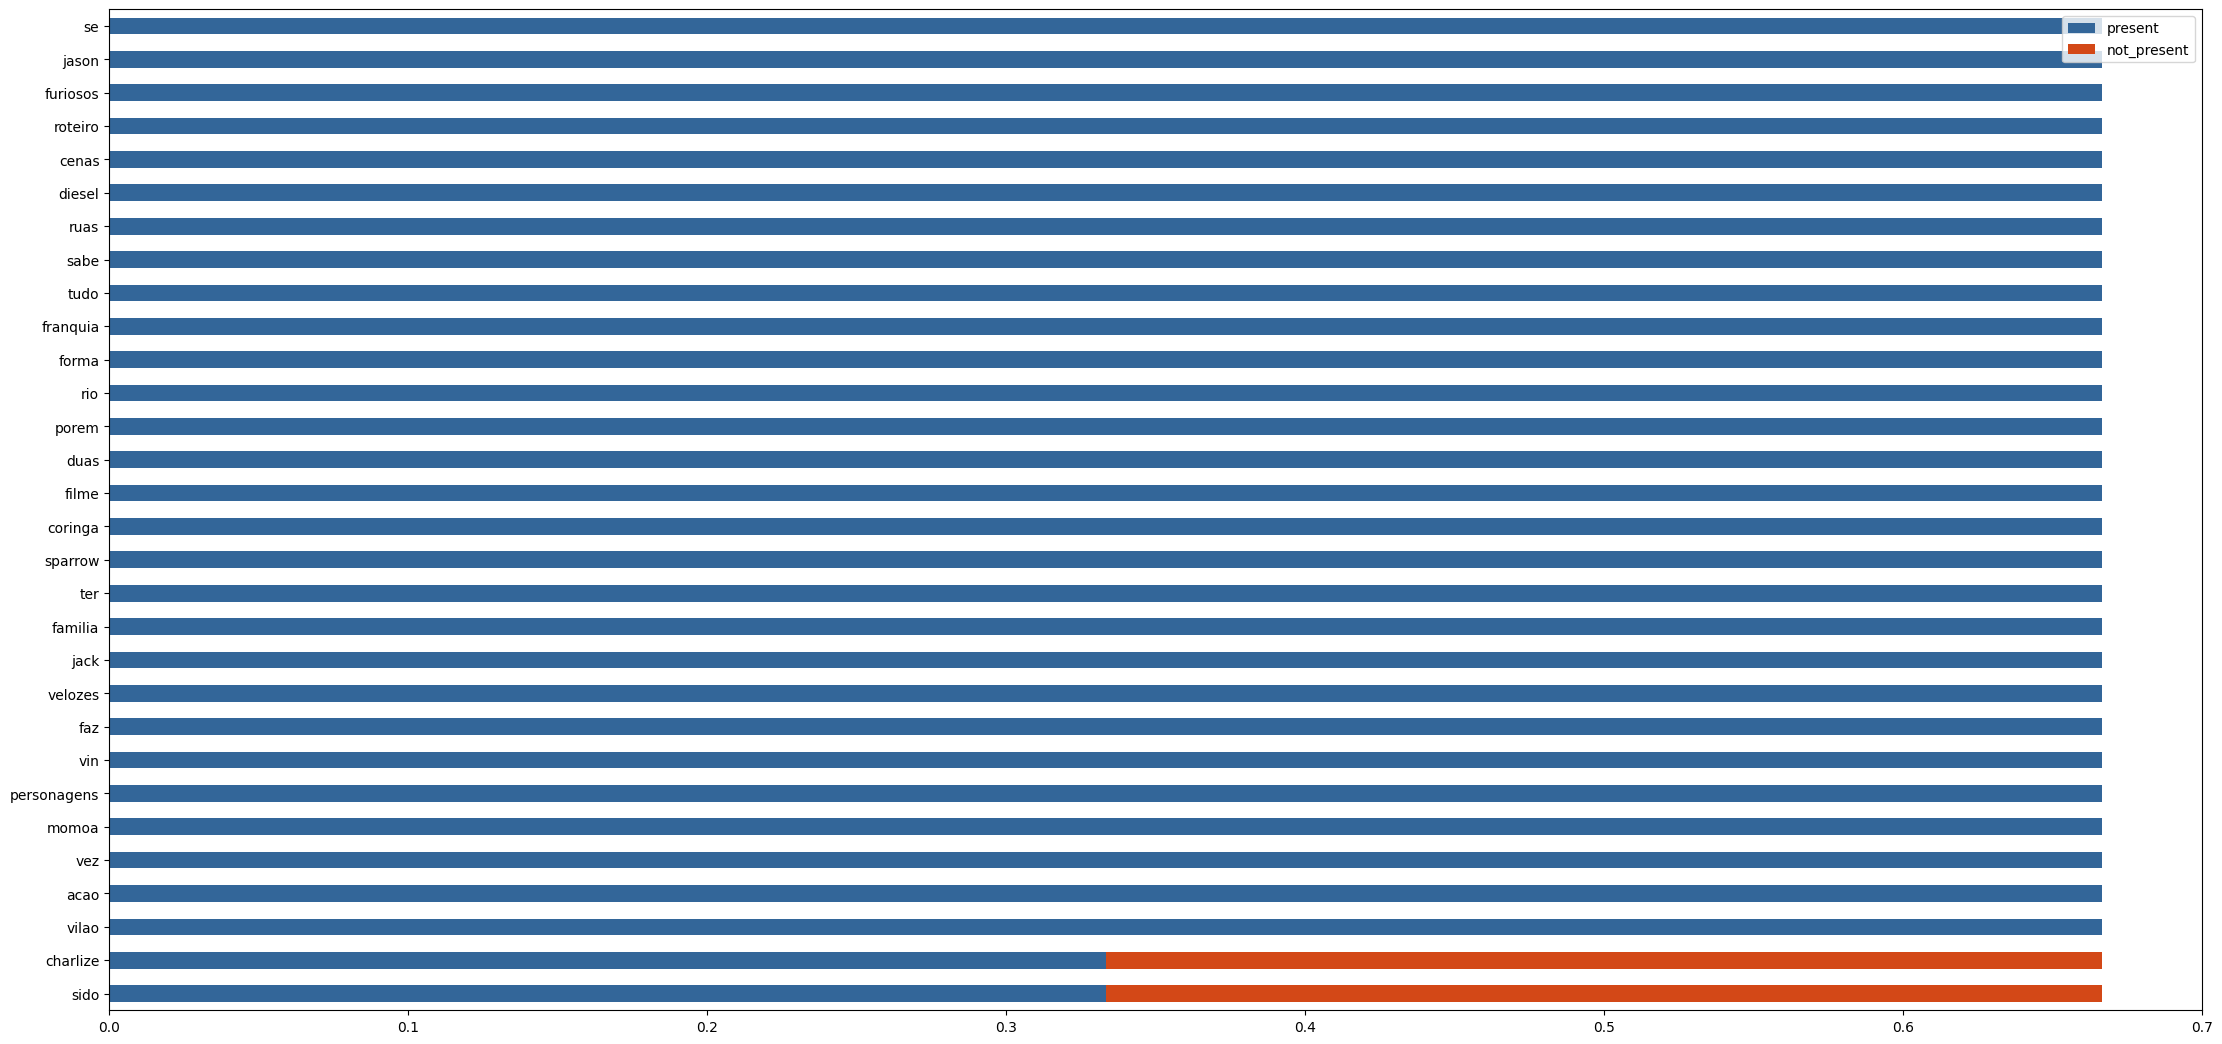

In [12]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXAJT = pdXAJ.T

#Calcula a quantidade de documetnos que aquela palavra entrou ou nao entrou
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_ver['content'])
pdXAJT['not_present'] = pdXAJT.eq(0).sum(axis=1) / len(df_ver['content'])
display(pdXAJT)
#REmove as colunas individuais de cada documento para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:len(df_ver['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXAJT = pdXAJT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXAJT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [13]:
n_words = 30
pdXAJT.tail(n_words)

,present,not_present
sido,0.333333,0.333333
charlize,0.333333,0.333333
vilao,0.666667,0.000000
acao,0.666667,0.000000
vez,0.666667,0.000000
momoa,0.666667,0.000000
personagens,0.666667,0.000000
vin,0.666667,0.000000
faz,0.666667,0.000000
velozes,0.666667,0.000000


,coringa,duas,jack,forma,jason,velozes,momoa,personagens,vez,furiosos,...,tudo,faz,roteiro,ruas,sabe,familia,franquia,grande,carros,present
0,1,1,1,1,2,12,3,2,2,6,...,4,3,2,1,1,5,4,2,0,0.966667
1,1,1,1,1,1,7,1,3,2,7,...,2,2,1,1,2,4,5,1,1,1.000000
2,1,2,1,1,1,4,4,2,1,4,...,1,1,2,1,1,5,5,0,2,0.966667


,present
0,0.966667
1,1.000000
2,0.966667


<Axes: >

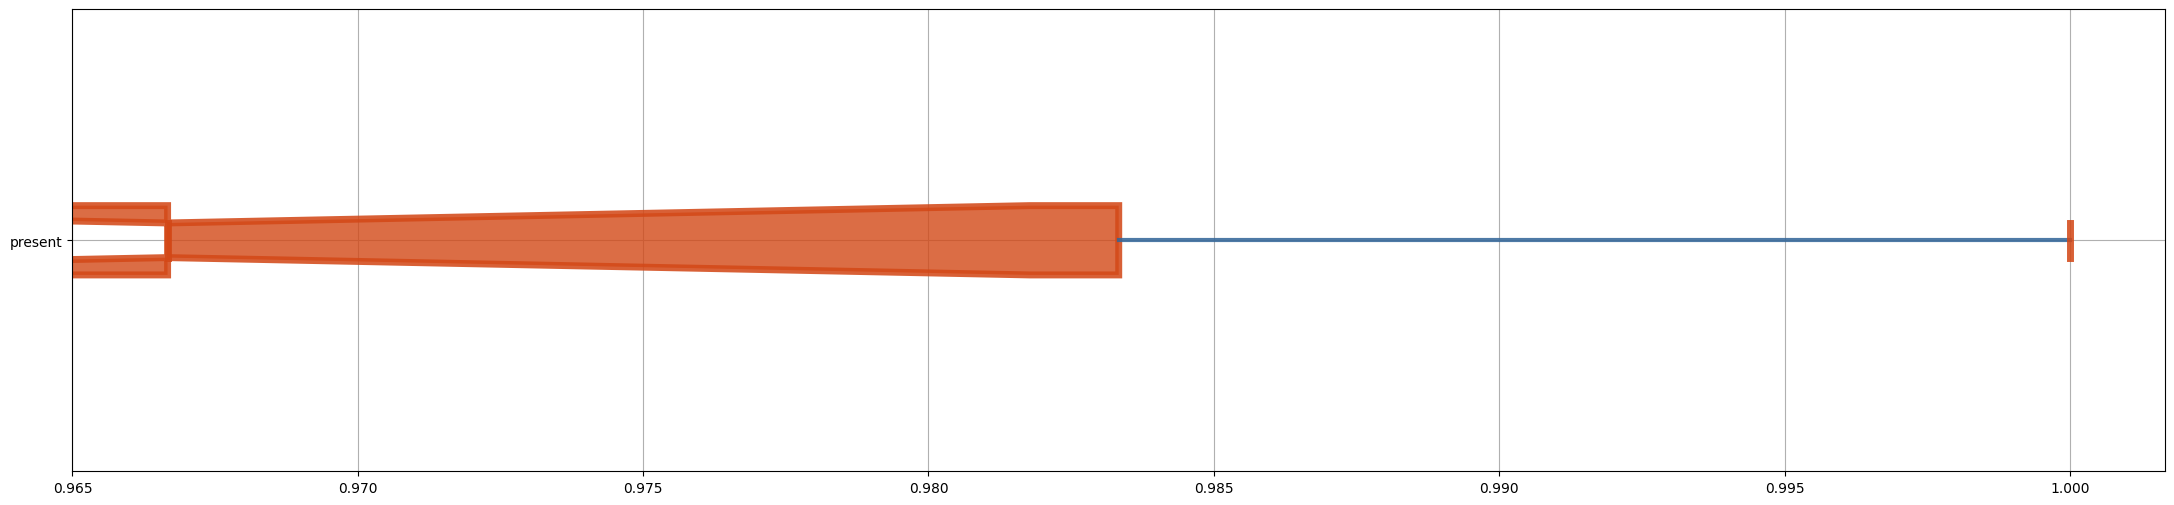

In [14]:
#Reinicia a matriz transposta
pdXAJT = pdXAJ.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_ver['content_treated'])
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)
pdXAJT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXAJT.head(n_words).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXAJT = pdXAJT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1)) / n_words
display(pdXAJT)

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXAJT.drop(pdXAJT.columns[0:n_words], axis=1, inplace=True)
display(pdXAJT)
#Gera o gráfico de boxplor 
pdXAJT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)


In [15]:
#Reinicia a matriz
pdXAJT = pdXAJ.T

#Mantem o percentual de frequencia de uso para comparação
pdXAJT['present'] = (pdXAJT.ne(0).sum(axis=1) -1) / len(df_ver['content_treated'])

#Ordena
pdXAJT = pdXAJT.sort_values(by='present', ascending=False)

#Mantem so as 30 primeiras palavras
pdXAJT = pdXAJT.head(n_words)


# Apaga todas as clunas, pois so queremos manter o indice para avaliar os demais textos
pdXAJT.drop(pdXAJT.columns[0:424], axis=1, inplace=True)


# Cria-se o Saco de Paalvara para os 3 textos que se deseja avaliar

pdXVERT = pdXVER.T.rename(columns={0: "Omelete", 1: "CinePOP", 2:"PlanoCritico"})

In [16]:
pd_comp = pd.merge(left=pdXAJT, right=pdXVERT, how='left', left_index=True, right_index=True)
   
pd_comp.replace(np.nan, 0, inplace=True)
pd_compT = pd_comp.T

pd_compT['most_commons'] = (pd_compT.ne(0).sum(axis=1)) / n_words
#pd_compT.drop(pd_compT.columns[0:30], axis=1, inplace=True)
pd_compT.T.round(2)

,Omelete,CinePOP,PlanoCritico
coringa,1.00,1.0,1.00
duas,1.00,1.0,2.00
jack,1.00,1.0,1.00
forma,1.00,1.0,1.00
jason,2.00,1.0,1.00
velozes,12.00,7.0,4.00
momoa,3.00,1.0,4.00
personagens,2.00,3.0,2.00
vez,2.00,2.0,1.00
furiosos,6.00,7.0,4.00
